In [17]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
df = pd.read_csv('sleep-patterns.csv')
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [19]:
# Identify null values columns and impute values using strategy depending upon the feature context
 
from sklearn.impute import SimpleImputer

print("Columns containing null values: ")
print(df.columns[df.isnull().any()].tolist())

mode_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

df['Awakenings'] = mode_imputer.fit_transform(df[['Awakenings']])
df['Exercise frequency'] = mode_imputer.fit_transform(df[['Exercise frequency']])
df['Caffeine consumption'] = mean_imputer.fit_transform(df[['Caffeine consumption']])
df['Alcohol consumption'] = mean_imputer.fit_transform(df[['Alcohol consumption']])

print('\n\nnull values sum in each column after imputation')
df.isnull().sum()

Columns containing null values: 
['Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']


null values sum in each column after imputation


ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

In [20]:
#remove the unnecessary id column
df.drop_duplicates(subset='ID')
df=df.drop(columns='ID', axis=1)
df

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.000000,0.0,Yes,3.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.000000,3.0,Yes,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.000000,0.0,No,3.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.000000,5.0,Yes,1.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.000000,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.000000,0.0,No,5.0
448,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.000000,0.0,No,3.0
449,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,23.653396,3.0,Yes,0.0
450,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.000000,0.0,No,3.0


In [21]:
# map nominal values columns (Smoking status) to appropriate values
df['Smoking status'] = df['Smoking status'].map({'Yes': 1, 'No': 0})
df

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.000000,0.0,1,3.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.000000,3.0,1,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.000000,0.0,0,3.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.000000,5.0,1,1.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.000000,3.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.000000,0.0,0,5.0
448,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.000000,0.0,0,3.0
449,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,23.653396,3.0,1,0.0
450,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.000000,0.0,0,3.0


In [22]:
#convert gender column to respective dummies columns
df=pd.concat([df,pd.get_dummies(df['Gender'])], axis=1)
df=df.drop('Gender', axis=1)
df

,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Female,Male
0,65,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.000000,0.0,1,3.0,1,0
1,69,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.000000,3.0,1,3.0,0,1
2,40,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.000000,0.0,0,3.0,1,0
3,40,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.000000,5.0,1,1.0,1,0
4,57,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.000000,3.0,0,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.000000,0.0,0,5.0,1,0
448,52,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.000000,0.0,0,3.0,0,1
449,40,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,23.653396,3.0,1,0.0,1,0
450,45,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.000000,0.0,0,3.0,0,1


In [23]:
#Bring the target feature/column to the end
target = df.pop('Sleep efficiency')
df.insert(len(df.columns), "Sleep efficiency", target)
df

,Age,Bedtime,Wakeup time,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Female,Male,Sleep efficiency
0,65,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,18,70,12,0.0,0.000000,0.0,1,3.0,1,0,0.88
1,69,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,19,28,53,3.0,0.000000,3.0,1,3.0,0,1,0.66
2,40,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,20,70,10,1.0,0.000000,0.0,0,3.0,1,0,0.89
3,40,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,23,25,52,3.0,50.000000,5.0,1,1.0,1,0,0.51
4,57,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,27,55,18,3.0,0.000000,3.0,0,3.0,0,1,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,22,57,21,0.0,0.000000,0.0,0,5.0,1,0,0.91
448,52,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,28,57,15,4.0,25.000000,0.0,0,3.0,0,1,0.74
449,40,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,20,32,48,1.0,23.653396,3.0,1,0.0,1,0,0.55
450,45,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,18,72,10,3.0,0.000000,0.0,0,3.0,0,1,0.76


In [24]:
# encode Bedtime and Wakeup time column values by converting them to only relevant hour values

df['Bedtime'] = pd.to_datetime(df['Bedtime']).dt.hour
df['Wakeup time'] = pd.to_datetime(df['Wakeup time']).dt.hour
df

,Age,Bedtime,Wakeup time,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Female,Male,Sleep efficiency
0,65,1,7,6.0,18,70,12,0.0,0.000000,0.0,1,3.0,1,0,0.88
1,69,2,9,7.0,19,28,53,3.0,0.000000,3.0,1,3.0,0,1,0.66
2,40,21,5,8.0,20,70,10,1.0,0.000000,0.0,0,3.0,1,0,0.89
3,40,2,8,6.0,23,25,52,3.0,50.000000,5.0,1,1.0,1,0,0.51
4,57,1,9,8.0,27,55,18,3.0,0.000000,3.0,0,3.0,0,1,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,22,5,7.5,22,57,21,0.0,0.000000,0.0,0,5.0,1,0,0.91
448,52,21,3,6.0,28,57,15,4.0,25.000000,0.0,0,3.0,0,1,0.74
449,40,23,7,8.5,20,32,48,1.0,23.653396,3.0,1,0.0,1,0,0.55
450,45,21,4,7.0,18,72,10,3.0,0.000000,0.0,0,3.0,0,1,0.76


In [25]:
#round Caffeine consumption column values upto 2 decimal places
df['Caffeine consumption'] = df['Caffeine consumption'].round(2)
df

,Age,Bedtime,Wakeup time,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Female,Male,Sleep efficiency
0,65,1,7,6.0,18,70,12,0.0,0.00,0.0,1,3.0,1,0,0.88
1,69,2,9,7.0,19,28,53,3.0,0.00,3.0,1,3.0,0,1,0.66
2,40,21,5,8.0,20,70,10,1.0,0.00,0.0,0,3.0,1,0,0.89
3,40,2,8,6.0,23,25,52,3.0,50.00,5.0,1,1.0,1,0,0.51
4,57,1,9,8.0,27,55,18,3.0,0.00,3.0,0,3.0,0,1,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,22,5,7.5,22,57,21,0.0,0.00,0.0,0,5.0,1,0,0.91
448,52,21,3,6.0,28,57,15,4.0,25.00,0.0,0,3.0,0,1,0.74
449,40,23,7,8.5,20,32,48,1.0,23.65,3.0,1,0.0,1,0,0.55
450,45,21,4,7.0,18,72,10,3.0,0.00,0.0,0,3.0,0,1,0.76


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.drop('Sleep efficiency', axis=1)
y = df['Sleep efficiency']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 
x_train

,Age,Bedtime,Wakeup time,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Female,Male
24,24,0,7,7.0,15,75,10,1.0,23.65,5.0,0,2.0,0,1
17,40,23,6,7.5,18,20,62,3.0,50.00,2.0,1,3.0,1,0
66,25,0,7,7.0,15,70,15,4.0,0.00,4.0,0,2.0,0,1
301,25,0,8,8.5,26,56,18,2.0,25.00,0.0,0,1.0,1,0
356,51,22,6,8.0,20,62,18,0.0,0.00,0.0,0,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,53,21,4,7.0,25,20,55,3.0,0.00,5.0,0,2.0,0,1
270,44,0,8,8.0,23,60,17,1.0,23.65,0.0,0,0.0,1,0
348,57,1,8,7.0,22,65,13,0.0,25.00,0.0,1,1.0,0,1
435,40,22,5,7.0,28,57,15,0.0,0.00,0.0,0,3.0,1,0


<Axes: >

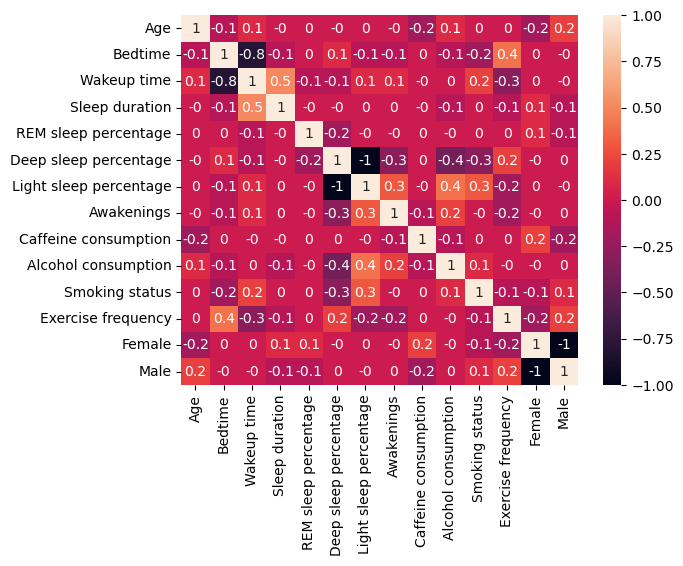

In [27]:
corr_matrix = x_train.corr()
sns.heatmap(corr_matrix.round(1), annot=True)

In [28]:
#find highly correlated features/columns
threshold = 0.8

mask = (corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1.0)
highly_correlated_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) for i in range(len(corr_matrix.columns)) for j in range(i) if mask.iloc[i,j]]
highly_correlated_pairs

[('Light sleep percentage', 'Deep sleep percentage')]

In [29]:
# remove the correlated feature from the training and test dataset

x_train = x_train.drop(columns='Light sleep percentage', axis=1)
x_test = x_test.drop(columns='Light sleep percentage', axis=1)
x_train

,Age,Bedtime,Wakeup time,Sleep duration,REM sleep percentage,Deep sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Female,Male
24,24,0,7,7.0,15,75,1.0,23.65,5.0,0,2.0,0,1
17,40,23,6,7.5,18,20,3.0,50.00,2.0,1,3.0,1,0
66,25,0,7,7.0,15,70,4.0,0.00,4.0,0,2.0,0,1
301,25,0,8,8.5,26,56,2.0,25.00,0.0,0,1.0,1,0
356,51,22,6,8.0,20,62,0.0,0.00,0.0,0,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,53,21,4,7.0,25,20,3.0,0.00,5.0,0,2.0,0,1
270,44,0,8,8.0,23,60,1.0,23.65,0.0,0,0.0,1,0
348,57,1,8,7.0,22,65,0.0,25.00,0.0,1,1.0,0,1
435,40,22,5,7.0,28,57,0.0,0.00,0.0,0,3.0,1,0


In [30]:
#train the linear regression model

linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)

LinearRegression()

In [31]:
# test and evaluate the model using mean squared error

y_predict = linear_regression_model.predict(x_test)

mse = mean_squared_error(y_test, y_predict)
mse

0.003882191205942242

In [32]:
# evaluation result of R-squared (Coefficient of Determination) and Adjusted R-squared

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_predict)
print("R-squared:", r2)

n = len(y_test)
p = len(x_test.columns)

adjusted_r_squared = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R-squared:", adjusted_r_squared)

R-squared: 0.7914825675012894
Adjusted R-squared: 0.7562783256508577
